<a href="https://colab.research.google.com/github/asm916/image-processing/blob/main/Croprow_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#import dependencies
import cv2
import numpy as np
import matplotlib.pyplot as plt
#load image using cv's imread(nameoffile)
img = cv2.imread('/trees.png')

gscale [[ 11  10  22 ...  16 247 243]
 [ 44  54  48 ...  17 250 242]
 [ 64  83  78 ...  28   0 246]
 ...
 [ 20   6 252 ... 246 244 245]
 [ 44  29  11 ... 246 246 247]
 [ 62  56  41 ... 245 245 245]]
gscale [[  0   0   0 ...   0 255   0]
 [  0 255 255 ...   0 255   0]
 [  0   0   0 ...   0 255   0]
 ...
 [  0 255 255 ...   0   0   0]
 [  0   0 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


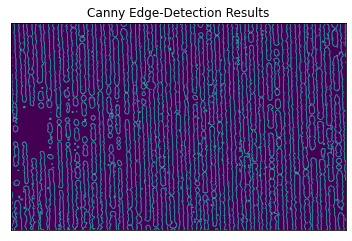

In [32]:
#split the image into blue, green, and red channels
b,g,r = cv2.split(img) 
#here we 'amplify' the color green to stand out, without red/blue
gscale = 2*g-r-b #we are going to refer to this as our grayscale img
print('gscale', gscale)
#Canny edge detection 
gscale = cv2.Canny(gscale,280,290,apertureSize = 3)
print('gscale', gscale)
#checking the results (good practice)
plt.figure()
plt.plot(), plt.imshow(gscale)
plt.title('Canny Edge-Detection Results')
plt.xticks([]), plt.yticks([])
plt.show()

In [33]:
size = np.size(gscale) #returns the product of the array dimensions
print('size', size)
skel = np.zeros(gscale.shape,np.uint8) #array of zeros
print('skel', skel)
ret,gscale = cv2.threshold(gscale,127,255,cv2.THRESH_BINARY) #thresholding the image
print('ret', ret)
print('gscale', gscale)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
print('element', element)
done = False
while( not done):
    eroded = cv2.erode(gscale,element)
    print('eroded', eroded)
    temp = cv2.dilate(eroded,element)
    print('temp', temp)
    temp = cv2.subtract(gscale,temp)
    print('temp', temp)
    skel = cv2.bitwise_or(skel,temp)
    print(skel)
    gscale = eroded.copy()
    print('gscale', gscale)
    print('done', done) 
    zeros = size - cv2.countNonZero(gscale)
    if zeros==size:
      done = True

size 311960
skel [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
ret 127.0
gscale [[  0   0   0 ...   0 255   0]
 [  0 255 255 ...   0 255   0]
 [  0   0   0 ...   0 255   0]
 ...
 [  0 255 255 ...   0   0   0]
 [  0   0 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
element [[0 1 0]
 [1 1 1]
 [0 1 0]]
eroded [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
temp [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
temp [[  0   0   0 ...   0 255   0]
 [  0 255 255 ...   0 255   0]
 [  0   0   0 ...   0 255   0]
 ...
 [  0 255 255 ...   0   0   0]
 [  0   0 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[  0   0   0 ...   0 255   0]
 [  0 255 255 ...   0 255   0]
 [  0   0   0 ...   0 255   0]
 ...
 [  0 255 255 ...   0   0   0]
 [  0   0 255 ...   0   0   0]
 [  0   0

[[[-447.           3.106686 ]]

 [[-271.           3.106686 ]]

 [[-457.           3.106686 ]]

 [[-429.           3.106686 ]]

 [[-350.           3.106686 ]]

 [[-653.           3.106686 ]]

 [[-332.           3.106686 ]]

 [[-510.           3.106686 ]]

 [[-305.           3.106686 ]]

 [[-323.           3.106686 ]]

 [[-262.           3.106686 ]]

 [[-438.           3.106686 ]]

 [[-341.           3.106686 ]]

 [[-671.           3.106686 ]]

 [[-689.           3.106686 ]]

 [[-314.           3.106686 ]]

 [[-252.           3.106686 ]]

 [[-378.           3.106686 ]]

 [[-281.           3.106686 ]]

 [[-287.           3.106686 ]]

 [[-368.           3.106686 ]]

 [[-178.           3.106686 ]]

 [[-642.           3.106686 ]]

 [[-618.           3.106686 ]]

 [[-296.           3.106686 ]]

 [[-413.           3.106686 ]]

 [[ -79.           3.106686 ]]

 [[-117.           3.106686 ]]

 [[-678.           3.106686 ]]

 [[-395.           3.106686 ]]

 [[-387.           3.106686 ]]

 [[-635.

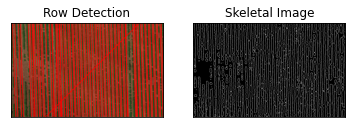

In [34]:
lines = cv2.HoughLines(skel,1,np.pi/180,130)
print(lines)


a,b,c = lines.shape
for i in range(a):
    rho = lines[i][0][0]
    theta = lines[i][0][1]    
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2, cv2.LINE_AA)
#showing the results:
plt.subplot(121)
#OpenCV reads images as BGR, this corrects so it is displayed as RGB
plt.plot(),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
plt.title('Row Detection'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.plot(),plt.imshow(skel,cmap='gray')
plt.title('Skeletal Image'), plt.xticks([]), plt.yticks([])
plt.show()